# Import libs and load data

In [1]:
import pandas as pd

input_file_name = "../dados/base_desafio_cartola.csv"

df = pd.read_csv(input_file_name)

df.head(3)

,user,sexo,uf,idade,dias,pviews,visitas,tempo_total,device,futebol,...,natacao,basquete,handebol,volei,tenis,canoagem,saltos_ornamentais,home,home_olimpiadas,cartola_status
0,1912357,NaN,NaN,NaN,12,31,20,3868.477,pc_e_m,0.000,...,0.0,0.0,0.000,46.851,0.0,0.000,0.000,0.0,606.427,Não Cartola
1,1914630,NaN,NaN,NaN,2,8,5,427.352,pc_only,201.338,...,0.0,0.0,0.000,45.000,0.0,0.000,0.000,0.0,0.000,Não Cartola
2,1915241,NaN,NaN,NaN,14,44,23,14758.755,pc_e_m,4867.997,...,90.0,0.0,2471.093,300.573,0.0,1956.698,431.616,0.0,91.721,Não Cartola


## Cria variável alvo binária

In [2]:
label = "cartola_status"
label_pro = "is_pro"

df = df[df[label].notna()]
df[label_pro] = (df[label] == 'Cartola Pro').astype(int)

## Gera novas variáveis para análise

In [3]:
import feature_generation

df_feat = feature_generation.get_new_features(df)

# Análise de Correlação

## Tempo das modalidades vs Variável Alvo

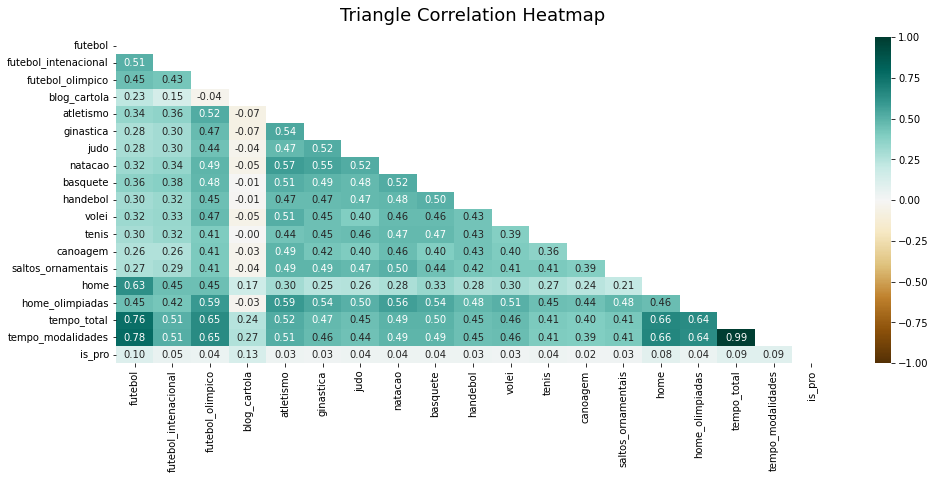

In [4]:
import data_vis

features = feature_generation.sport_features + ["tempo_total", "tempo_modalidades", label_pro] 

data_vis.plot_correlation(df_feat[features])

## Tempo das modalidades (percentual) vs Variável Alvo

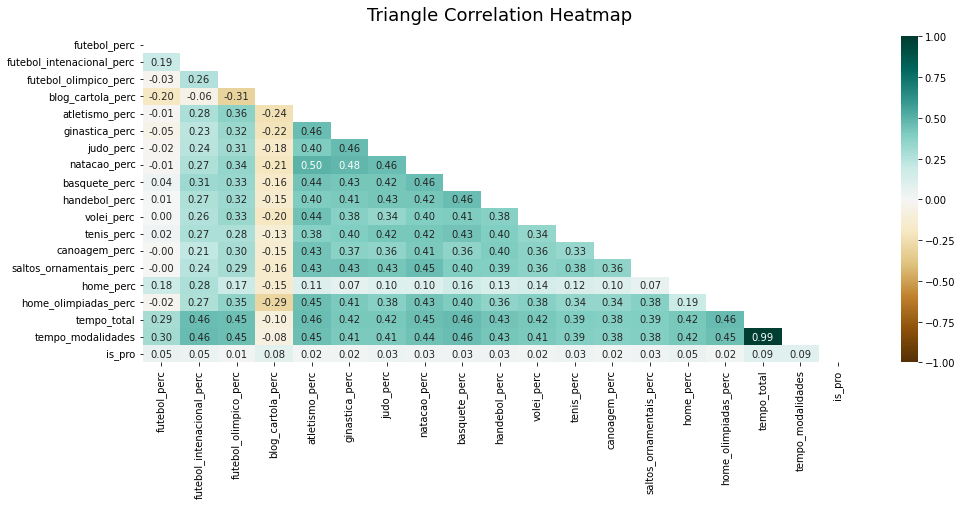

In [5]:
features = feature_generation.sport_features_perc + ["tempo_total", "tempo_modalidades", label_pro]

data_vis.plot_correlation(df_feat[features])

## Novas variáveis vs Variável Alvo

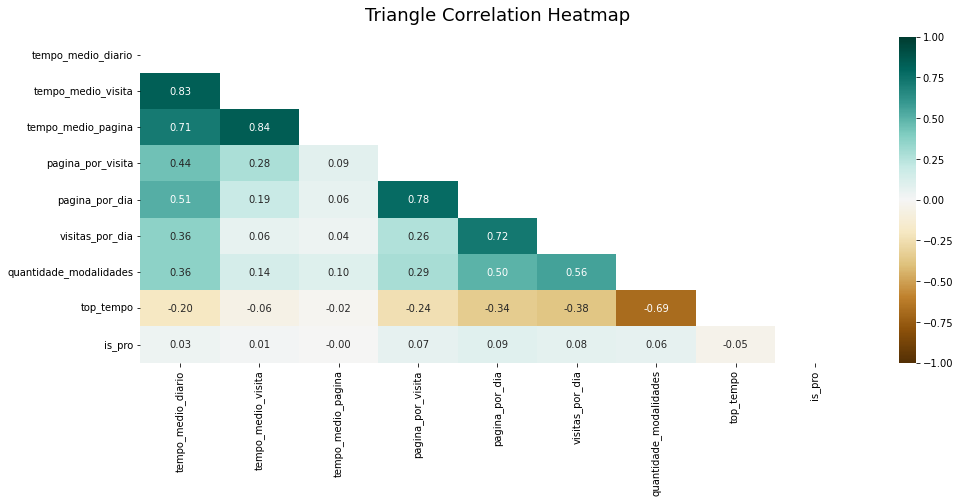

In [7]:
features = feature_generation.new_features + [label_pro]

data_vis.plot_correlation(df_feat[features], method="pearson")